In [36]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [38]:
tf.test.is_built_with_cuda()

True

In [39]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [40]:
x_train.shape

(50000, 32, 32, 3)

In [41]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

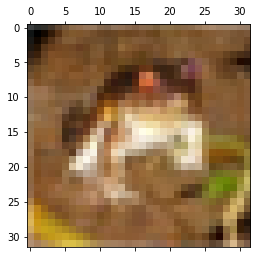

In [42]:
plt.matshow(x_train[0])

In [43]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [44]:
class_name[y_train[0][0]]

'frog'

In [45]:
## Never forget Scaling the data before using ANN

scaled_x_train = x_train/255
scaled_x_test = x_test/255

In [46]:
scaled_x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [47]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [48]:
categorical_y_train = keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')
categorical_y_test = keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [49]:
categorical_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(2500, activation='relu'),
    keras.layers.Dense(1500, activation='relu'),
    keras.layers.Dense(750, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(scaled_x_train, categorical_y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 241s 153ms/step - loss: 1.8943 - accuracy: 0.3150
Epoch 2/15
1563/1563 [==============================] - 216s 138ms/step - loss: 1.7008 - accuracy: 0.3882
Epoch 3/15
1563/1563 [==============================] - 222s 142ms/step - loss: 1.6202 - accuracy: 0.4162
Epoch 4/15
1563/1563 [==============================] - 230s 147ms/step - loss: 1.5788 - accuracy: 0.4304
Epoch 5/15
1563/1563 [==============================] - 218s 139ms/step - loss: 1.5324 - accuracy: 0.4474
Epoch 6/15
1563/1563 [==============================] - 228s 146ms/step - loss: 1.4983 - accuracy: 0.4599
Epoch 7/15
1563/1563 [==============================] - 221s 141ms/step - loss: 1.4694 - accuracy: 0.4710
Epoch 8/15
1563/1563 [==============================] - 217s 139ms/step - loss: 1.4443 - accuracy: 0.4776
Epoch 9/15
1563/1563 [==============================] - 222s 142ms/step - loss: 1.4153 - accuracy: 0.4894
Epoch 10/15
1563/1563 [=======================

In [51]:
model.evaluate(scaled_x_test,categorical_y_test)

313/313 [==============================] - 9s 28ms/step - loss: 1.5152 - accuracy: 0.4760


[1.5151996612548828, 0.47600001096725464]

In [52]:
scaled_x_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [53]:
scaled_x_test[0].shape

(32, 32, 3)

In [54]:
class_name[np.argmax(model.predict(scaled_x_test)[0])]

313/313 [==============================] - 9s 28ms/step


'cat'

In [55]:
class_name[y_test[0][0]]

'cat'

In [1]:
# Checking a random sample

import random
i = random.randint(0, len(y_test))
print(i)
plt.matshow(x_test[i])
print("Predicted class: ",class_name[np.argmax(model.predict(scaled_x_test)[i])])
print("Actual class: ",class_name[y_test[i][0]])

NameError: name 'y_test' is not defined